# Tugas Besar IF2220 Probabilitas dan Statistika 23/24

Author: Aland Mulia Pratama (13522124), Christian Justin Hendrawan (13522135) (Kelompok 12 K03)

## Analisis Statistika
### Soal General [Untuk setiap jenis dataset] 

1) Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

2) Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

3) Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

4) Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

### Dataset Candy
Andi baru saja mendapatkan pekerjaan di sebuah perusahaan permen. Di hari pertama kerja, Ia diminta untuk mengamati permen-permen yang dihasilkan pada pabrik. Selain itu, ia juga diberikan dataset yang berisi informasi mengenai permen-permen yang baru diproduksi. Lalu, ia diminta untuk melakukan analisis statistika terhadap permen-permen tersebut serta melakukan berbagai pengujian terhadap berbagai hipotesis. Bantulah Andi dalam melakukan hal-hal tersebut!

Atribut: Calories, Serving, Protein, Sugar, Sodium, Fat, Fiber, Flavour, Popularity

Gunakan alpha = 0.05

5) Hipotesis 1 sampel
    - Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
    - Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
    - Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
    - Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!

6) Hipotesis 2 sampel

    Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang.
    - Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
    - Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
    - Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
    - Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

data = pd.read_csv('candy.csv')
data = data.drop(columns=['Unnamed: 0'])
data.describe()

,Calories,Serving,Protein,Sugar,Sodium,Fat,Fiber,Popularity
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,199.996046,39.989139,2.974415,20.004080,74.982853,6.748226,0.490851,49.967119
std,1.127015,1.073182,1.012686,0.888751,1.007484,0.658202,0.292242,10.145767
min,195.897565,36.424752,-0.571292,16.925305,71.405873,5.162155,0.000487,-3.000000
25%,199.212548,39.272877,2.245751,19.409965,74.276512,6.279173,0.238509,42.948183
50%,200.001306,39.977855,2.979177,20.004798,75.000056,6.667726,0.489901,49.955385
75%,200.777167,40.734991,3.655002,20.588626,75.677900,7.170426,0.736093,57.153024
max,204.713237,43.561506,6.392027,22.922444,78.232301,9.498653,3.000000,86.469784


# Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [80]:
stats = pd.DataFrame()

unique_values = data['Flavour'].unique()

proportions = data['Flavour'].value_counts(normalize=True)

print("Unique values in kolom 'Flavour':", unique_values)
print("Proportions of unique values in 'Flavour' column:\n",proportions)

def get_mode(x):
    modes = x.mode()
    if len(modes) > 1:
        return 'multivalued'
    else:
        return modes[0]

display(Markdown(("#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis")))

stats['Mean'] = data.mean(numeric_only=True)
stats['Median'] = data.median(numeric_only=True)
stats['Mode'] = data.apply(get_mode)
stats['Std Dev'] = data.std(numeric_only=True)
stats['Variance'] = data.var(numeric_only=True)
stats['Min'] = data.min()
stats['Max'] = data.max()
stats['Range'] = stats['Max'] - stats['Min']
stats['Q1'] = data.quantile(0.25, numeric_only=True)
stats['Q2'] = data.quantile(0.5, numeric_only=True)
stats['Q3'] = data.quantile(0.75, numeric_only=True)
stats['IQR'] = stats ["Q3"] - stats ["Q1"]
stats['Skewness'] = data.skew(numeric_only=True)
stats['Kurtosis'] = data.kurtosis(numeric_only=True)

stats


Unique values in kolom 'Flavour': ['Vanilla' 'Strawberry' 'Chocolate' 'undefined']
Proportions of unique values in 'Flavour' column:
 Flavour
Chocolate     0.339
Vanilla       0.332
Strawberry    0.328
undefined     0.001
Name: proportion, dtype: float64


#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.996046,200.001306,multivalued,1.127015,1.270162,195.897565,204.713237,8.815673,199.212548,200.001306,200.777167,1.564619,0.041929,0.198919
Serving,39.989139,39.977855,multivalued,1.073182,1.151719,36.424752,43.561506,7.136754,39.272877,39.977855,40.734991,1.462113,0.031222,-0.119331
Protein,2.974415,2.979177,multivalued,1.012686,1.025532,-0.571292,6.392027,6.963319,2.245751,2.979177,3.655002,1.409251,0.089544,-0.099028
Sugar,20.004080,20.004798,multivalued,0.888751,0.789878,16.925305,22.922444,5.997139,19.409965,20.004798,20.588626,1.178660,0.006416,-0.048001
Sodium,74.982853,75.000056,multivalued,1.007484,1.015025,71.405873,78.232301,6.826428,74.276512,75.000056,75.677900,1.401387,-0.030713,-0.025462
Fat,6.748226,6.667726,multivalued,0.658202,0.433230,5.162155,9.498653,4.336498,6.279173,6.667726,7.170426,0.891253,0.537265,0.235368
Fiber,0.490851,0.489901,multivalued,0.292242,0.085406,0.000487,3.0,2.999513,0.238509,0.489901,0.736093,0.497585,0.324107,1.396380
Popularity,49.967119,49.955385,multivalued,10.145767,102.936586,-3.0,86.469784,89.469784,42.948183,49.955385,57.153024,14.204841,-0.148562,0.807764


# Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

## Jawaban
Outliers adalah nilai-nilai dalam data yang secara signifikan berbeda dari sebagian besar nilai lainnya dalam kumpulan data. Pada kasus ini, kami mengidentifikasi outliers dengan cara menghitung Inter Quartile range (IQR) dengan mencari selisih antara quartil pertama (Q1) dan quartil ketiga (q3). Outliers diidentifikasi sebagai nilai yang lebih rendah dari Q1 dikurangi 1.5 kali IQR atau lebih besar dari Q3 ditambah 1.5 kali IQR. Dalam dataset candy, terdapat beberapa outliers pada hasil program berdasarkan kolom numerik. Outliers dapat ditangani dengan melihat apakah itu merupakan data anomali atau tidak. Namun, pada umumnya penanganan outlier tergantung pada tujuan analisis, karakteristik data, dan konteks spesifik masalah. Dalam penanganan outliers pada dataset Candy, saya menggunakan metode Winsorization dengan cara mengubah nilai outliers menjadi nilai median pada kolom numerik tersebut. Dapat dilihat bahwa setelah proses cleaning data dilakukan outliers berkurang secara signifikan atau bahkan hingga tidak ada outliers sama sekali pada kolom numerik dataset Candy. Terdapat beberapa kolom numerik yang masih memiliki outliers dikarenakan interquartile range yang berada pada setiap kolom numerik yang dibersihkan akan berubah. Terdapat beberapa data yang sebelumnya tidak terdeteksi sebagai outliers tetapi menjadi terdeteksi setelah data dibersihkan karena berada di luar __lower bound__ atau __upper bound__ yang baru. Fenomena tersebut terjadi pada kolom numerik seperti **Calories**, **Sugar**, **Sodium**, **Fat**, dan **Popularity**.

In [81]:
# Fungsi untuk mendeteksi outliers
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Select kolom numerik
numeric_cols = data.select_dtypes(include=np.number)

# deteksi outliers pada setiap kolom numerik
outliers = numeric_cols.apply(detect_outliers_iqr)
# Filter DataFrame untuk menampilkan hanya baris dengan nilai True
outliers_true = outliers[outliers.any(axis=1)]
outliers_count = outliers_true.sum()

# Display outliers
print("Jumlah outliers pada setiap kolom numerik:")
print(outliers_count)
# Filter DataFrame untuk menampilkan nilai outliers
outliers_values = {}
for col in outliers.columns:
    outlier_indices = outliers[col][outliers[col]].index
    outliers_values[col] = data.loc[outlier_indices, col]

# Display nilai outliers
for col, values in outliers_values.items():
    print(f"\nOutliers untuk kolom '{col}':")
    print(values)

Jumlah outliers pada setiap kolom numerik:
Calories      15
Serving       11
Protein       12
Sugar         13
Sodium        13
Fat           20
Fiber          1
Popularity    12
dtype: int64

Outliers untuk kolom 'Calories':
350     204.358711
515     204.713237
540     203.191292
732     203.453548
938     196.397612
996     203.636287
1089    203.222756
1108    195.897565
1156    196.821993
1313    196.863522
1391    196.570746
1431    204.253280
1523    196.581365
1726    196.635409
1787    203.865106
Name: Calories, dtype: float64

Outliers untuk kolom 'Serving':
235     43.273235
379     43.056253
398     43.185000
1070    43.561506
1144    43.024182
1149    36.866012
1187    36.819554
1422    43.256139
1470    43.157695
1569    42.953584
1948    36.424752
Name: Serving, dtype: float64

Outliers untuk kolom 'Protein':
25      6.132917
95     -0.571292
394    -0.181237
443     6.043756
613     5.819495
913     6.017333
1113    5.804349
1309   -0.168740
1524    5.987352
1574    5.9

In [82]:
# >> Proses cleaning data menggunakan metode Winsorization dengan cara mengganti nilai outliers dengan nilai median dari kolom tersebut 
# Hapus baris-baris tersebut dari data
cleaned_data = data

# Select kolom numerik
numeric_cols = cleaned_data.select_dtypes(include=np.number)

# Ganti nilai outliers dengan nilai median
for col in numeric_cols.columns:
    median_value = cleaned_data[col].median()
    cleaned_data.loc[outliers[col], col] = median_value

# >> Proses pengecekan ulang outliers pada data yang sudah dibersihkan
cleaned_outliers = cleaned_data.select_dtypes(include=np.number).apply(detect_outliers_iqr)

# Filter DataFrame untuk menampilkan hanya baris dengan nilai True
cleaned_outliers_true = cleaned_outliers[cleaned_outliers.any(axis=1)]
cleaned_outliers_count = cleaned_outliers_true.sum()

# Display outliers setelah data dibersihkan
print("Jumlah outliers pada setiap kolom numerik setelah data dibersihkan:")
print(cleaned_outliers_count)

Jumlah outliers pada setiap kolom numerik setelah data dibersihkan:
Calories      1
Serving       0
Protein       0
Sugar         1
Sodium        3
Fat           3
Fiber         0
Popularity    3
dtype: int64


# Nomor 3 

Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram.


# Jawaban
Visualisasi data dilakukan per kolom atau atribut, yang dibagi menjadi histogram dan boxplot.

Urutan atributnya adalah sebagai berikut :
* Fiber
* Protein
* Fat
* Sugar
* Serving
* Popularity
* Sodium
* Calories


In [83]:
# Menulis deksripsi statistik dari data yang sudah dibersihkan
stats1 = pd.DataFrame()

stats1['Mean'] = data.mean(numeric_only=True)
stats1['Median'] = data.median(numeric_only=True)
stats1['Mode'] = data.apply(get_mode)
stats1['Std Dev'] = data.std(numeric_only=True)
stats1['Variance'] = data.var(numeric_only=True)
stats1['Min'] = data.min()
stats1['Max'] = data.max()
stats1['Range'] = stats['Max'] - stats['Min']
stats1['Q1'] = data.quantile(0.25, numeric_only=True)
stats1['Q2'] = data.quantile(0.5, numeric_only=True)
stats1['Q3'] = data.quantile(0.75, numeric_only=True)
stats1['IQR'] = stats ["Q3"] - stats ["Q1"]
stats1['Skewness'] = data.skew(numeric_only=True)
stats1['Kurtosis'] = data.kurtosis(numeric_only=True)

stats1

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.992825,200.001306,200.001306,1.080665,1.167838,196.966579,203.081976,8.815673,199.227940,200.001306,200.759665,1.564619,-0.016001,-0.315343
Serving,39.981228,39.977855,39.977855,1.046153,1.094436,37.145138,42.86355,7.136754,39.283204,39.977855,40.723552,1.462113,-0.011641,-0.315409
Protein,2.968634,2.979177,2.979177,0.983833,0.967928,0.225252,5.705747,6.963319,2.248007,2.979177,3.645977,1.409251,0.064420,-0.343910
Sugar,20.000807,20.004798,20.004798,0.863164,0.745052,17.670197,22.25541,5.997139,19.417660,20.004798,20.574299,1.178660,-0.002310,-0.261948
Sodium,74.981764,75.000056,75.000056,0.975869,0.952320,72.216038,77.767179,6.826428,74.290466,75.000056,75.658448,1.401387,-0.034847,-0.302187
Fat,6.726845,6.667488,6.667726,0.624270,0.389713,5.162155,8.493017,4.336498,6.279173,6.667488,7.147426,0.891253,0.353723,-0.283857
Fiber,0.489596,0.489830,multivalued,0.286800,0.082254,0.000487,0.999587,2.999513,0.238509,0.489830,0.735537,0.497585,0.020728,-1.199259
Popularity,49.997604,49.955385,49.955385,9.698340,94.057799,21.900174,77.902259,89.469784,43.127711,49.955385,57.022382,14.204841,-0.000720,-0.285785


In [84]:
# sort column order by mean values ascending
data = cleaned_data.reindex(data.mean(numeric_only=True).sort_values().index, axis=1)


# Function to plot histogram and boxplot for a given attribute
def plot_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr, bins=15)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)

# Function to plot histogram and boxplot for a given discrete attribute
def plot_discrete_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)


def plot_categorical_attribute(data, attr):
    data[attr].value_counts().plot(kind='bar', title="Bar chart of " + attr)

def print_most_frequent_range(data, attr, bins=15):
    # Create histogram
    hist, bin_edges = np.histogram(data[attr], bins=bins)

    # Find the bin with the most frequencies
    max_freq_index = np.argmax(hist)

    # Print the range with most frequencies
    print(f"The range with most frequencies is: ({bin_edges[max_freq_index]}, {bin_edges[max_freq_index + 1]})")

# Fiber
Kolom Fiber, yang mengandung data desimal kontinu, didekati menggunakan 15 bin dengan lebar yang sama, sehingga menghasilkan pendekatan diskrit dari data kontinu pada histogram.

Fiber memiliki rentang 2.9995 dengan jarak antarkuartil (IQR) sebesar 0.497 dan frekuensi terbesar terdapat pada rentang sekitar 0.133 hingga 0.2.

Median yang ditampilkan pada box plot adalah 0.4898. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Fiber" sedikit condong ke kanan (positively skewed) sesuai dengan nilai Skewness 0.0207.

Nilai kurtosis sebesar -1.199 menunjukkan bahwa distribusi data "Fiber" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat bahwa puncak distribusi tidak terlalu runcing dan ada beberapa nilai ekstrem (outlier) pada ekor distribusi, meskipun tidak terlalu signifikan.

Sekilas, histogram Fiber tampak memiliki sedikit skewness positif, dengan nilai skewness sebesar 0.021. Hal ini menunjukkan bahwa distribusi data sedikit condong ke kanan, meskipun sangat minimal. Nilai maksimum 0.9996 juga tidak terlalu jauh dari mean (0.4896), sehingga tidak terlalu mempengaruhi skewness.

Secara keseluruhan, setelah data dibersihkan, distribusi Fiber menunjukkan sedikit skewness positif dengan rentang dan variansi yang mencerminkan penyebaran data. Box plot dan histogram secara kolektif membantu memvisualisasikan karakteristik ini dengan efektif.

The range with most frequencies is: (0.13370005424803474, 0.2003067225708115)


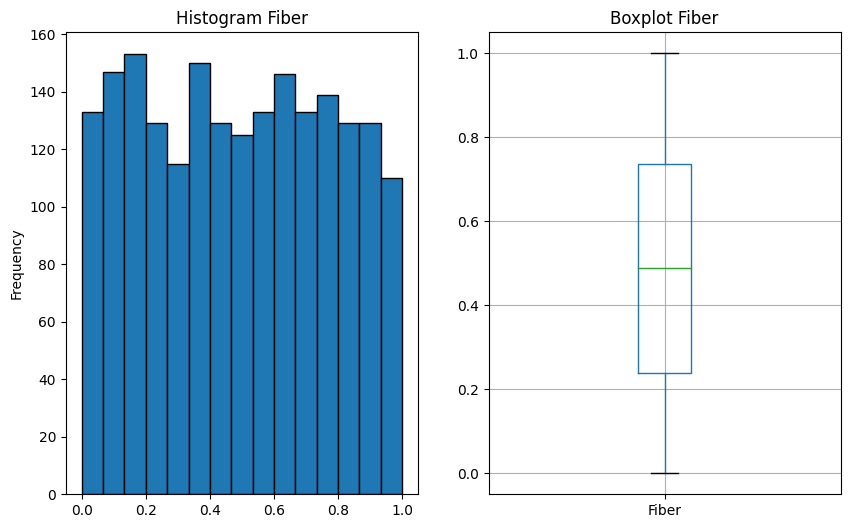

In [85]:
plot_attribute(data, 'Fiber')
print_most_frequent_range(data, 'Fiber')

# Protein

Kolom Protein yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Protein memiliki range 6.963 dengan jarak antarkuartil (IQR) 1.409 dan frekuensi terbesar terdapat pada range sekitar 2.783 sampai 3.148.

Median yang ditampilkan pada box plot adalah 2.979. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data "Protein" sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.064420 (positif).

Kurtosis sebesar -0.344 menunjukkan bahwa distribusi data "Protein" memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup melebar dan tidak terlalu runcing.

Tidak ada outlier pada kolom Protein. Kolom protein dengan mean (2.97), nilai skewness yang kecil (0.064420) mengindikasikan bahwa tidak adanya outlier-outlier tersebut membuatnya tidak terlalu kuat untuk menarik distribusi ke kanan dan menciptakan skewness positif yang signifikan.


The range with most frequencies is: (2.782816191342906, 3.1481825515117587)


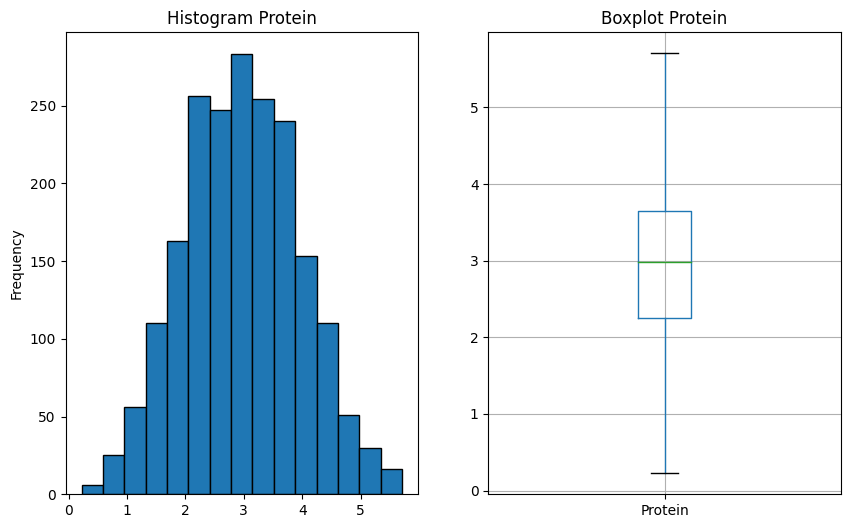

In [86]:
plot_attribute(data, 'Protein')
print_most_frequent_range(data, 'Protein')

# Fat

Kolom Fat yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Fat memiliki rentang (range) sebesar 4.336 dengan jarak antarkuartil (IQR) 0.891. Frekuensi terbesar terdapat pada rentang sekitar 6.495 hingga 6.717.

Median yang ditampilkan pada box plot adalah 6.667. Pada histogram, nilai median ini berada sedikit di kiri dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Fat sedikit condong ke kanan (positively skewed), sesuai dengan nilai skewness 0.354 (positif).

Kurtosis sebesar -0.284 menunjukkan bahwa distribusi data Fat memiliki ekor yang lebih tebal dan puncak yang kurang runcing dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup datar dan adanya beberapa nilai ekstrem (outlier).

Meskipun terdapat beberapa outlier pada kolom Fat, nilai skewness yang relatif kecil (0.354) menunjukkan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kanan secara signifikan dan menciptakan skewness positif yang besar.

The range with most frequencies is: (6.494500022114528, 6.716557465815512)


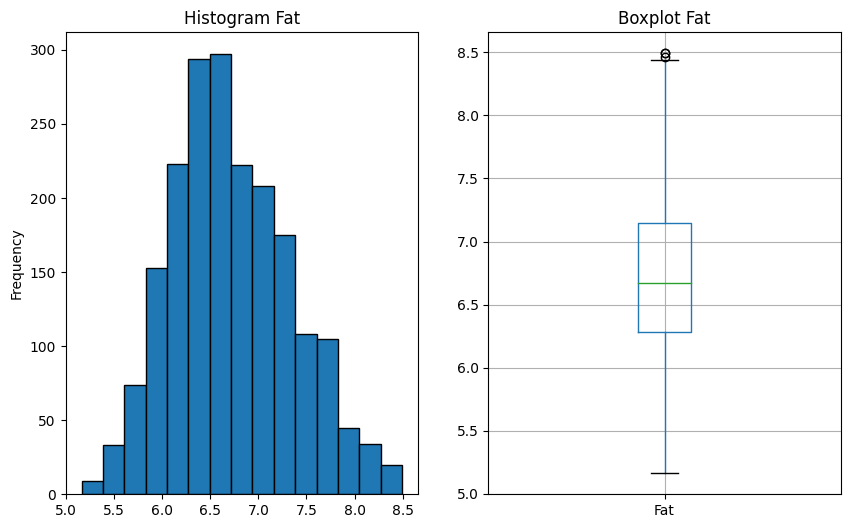

In [87]:
plot_attribute(data, 'Fat')
print_most_frequent_range(data, 'Fat')

# Sugar

Kolom Sugar yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Sugar memiliki rentang (range) sebesar 5.997 dengan jarak antarkuartil (IQR) 1.179. Frekuensi terbesar terdapat pada rentang sekitar 19.81 hingga 20.115.

Median yang ditampilkan pada box plot adalah 20.005. Pada histogram, nilai median ini berada tepat di tengah puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Sugar sangat simetris, sesuai dengan nilai skewness yang hampir nol (-0.002).

Kurtosis sebesar -0.262 menunjukkan bahwa distribusi data Sugar memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup lebar dan tidak terlalu runcing.

Meskipun terdapat beberapa outlier pada kolom Sugar, nilai skewness yang hampir nol (-0.002) menunjukkan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kanan atau ke kiri secara signifikan dan menciptakan skewness yang besar.

The range with most frequencies is: (19.80996307428899, 20.11564390100199)


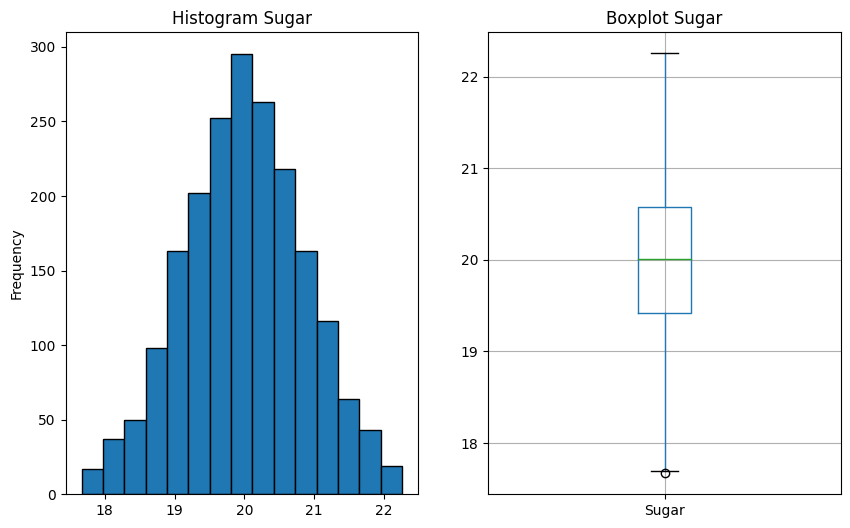

In [88]:
plot_attribute(data, 'Sugar')
print_most_frequent_range(data, 'Sugar')

# Serving

Kolom Serving yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Serving memiliki rentang (range) sebesar 7.137 dengan jarak antarkuartil (IQR) 1.462. Frekuensi terbesar terdapat pada rentang sekitar 39.814 hingga 40.195.

Median yang ditampilkan pada box plot adalah 39.978. Pada histogram, nilai median ini berada tepat di tengah puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Serving sangat simetris, sesuai dengan nilai skewness yang hampir nol (-0.012).

Kurtosis sebesar -0.315 menunjukkan bahwa distribusi data Serving memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup lebar dan tidak terlalu runcing.

Tidak terdapat outlier pada kolom Serving, nilai skewness yang hampir nol (-0.012) menunjukkan bahwa tidak adanya outlier pada kolom ini membuatnya tidak cukup kuat untuk menarik distribusi ke kanan atau ke kiri secara signifikan dan menciptakan skewness yang besar.

The range with most frequencies is: (39.81373019599619, 40.19495763741074)


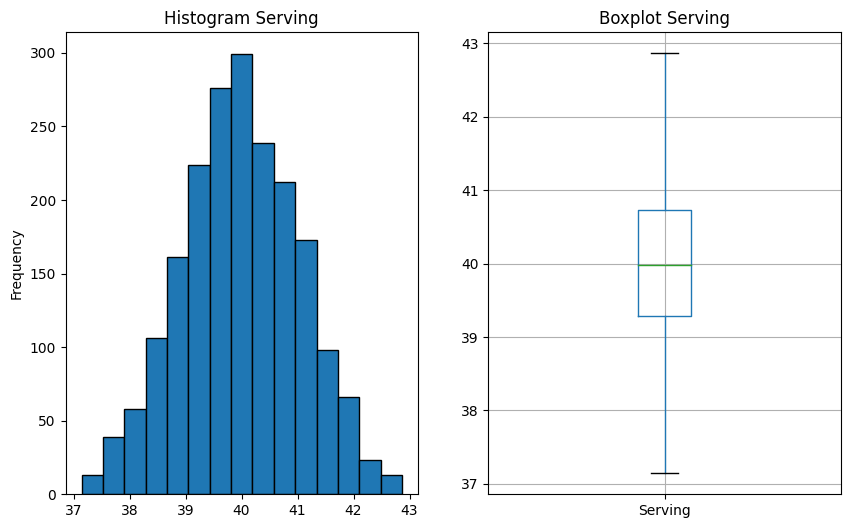

In [89]:
plot_attribute(data, 'Serving')
print_most_frequent_range(data, 'Serving')

# Popularity

Kolom Popularity yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Popularity memiliki rentang (range) sebesar 89.470 dengan jarak antarkuartil (IQR) 14.205. Frekuensi terbesar terdapat pada rentang sekitar 48.034 hingga 51.768.

Median yang ditampilkan pada box plot adalah 49.955. Pada histogram, nilai median ini berada sedikit di kanan dari puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Popularity sangat simetris, sesuai dengan nilai skewness yang hampir nol (-0.001).

Kurtosis sebesar -0.286 menunjukkan bahwa distribusi data Popularity memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup lebar dan tidak terlalu runcing.

Meskipun terdapat beberapa outlier pada kolom Popularity, nilai skewness yang hampir nol (-0.001) menunjukkan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kanan atau ke kiri secara signifikan dan menciptakan skewness yang besar.

The range with most frequencies is: (48.03448049484306, 51.767952816335594)


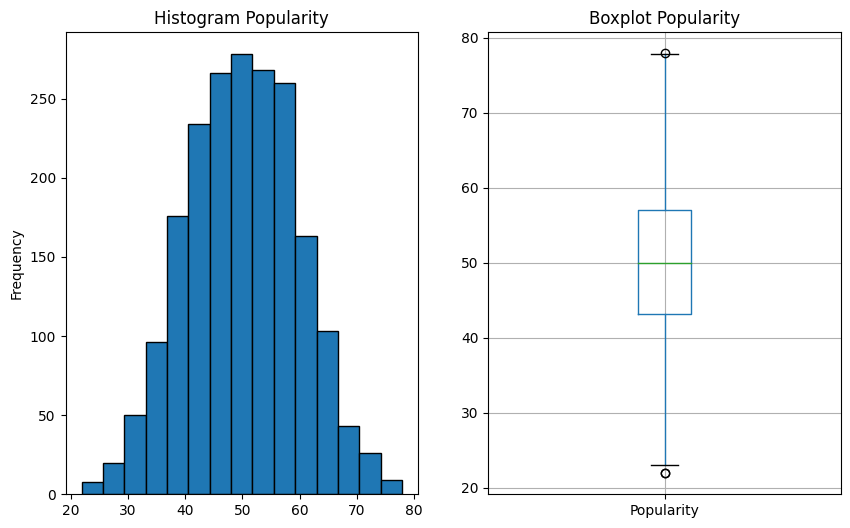

In [90]:
plot_attribute(data, 'Popularity')
print_most_frequent_range(data, 'Popularity')

# Sodium

Kolom Sodium yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Sodium memiliki rentang (range) sebesar 6.826 dengan jarak antarkuartil (IQR) 1.401. Frekuensi terbesar terdapat pada rentang sekitar 74.807 hingga 75.177.

Median yang ditampilkan pada box plot adalah 75.000. Pada histogram, nilai median ini berada tepat di tengah puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Sodium sangat simetris, sesuai dengan nilai skewness yang hampir nol (-0.035).

Kurtosis sebesar -0.302 menunjukkan bahwa distribusi data Sodium memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup lebar dan tidak terlalu runcing.

Meskipun terdapat beberapa outlier pada kolom Sodium, nilai skewness yang hampir nol (-0.035) menunjukkan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kanan atau ke kiri secara signifikan dan menciptakan skewness yang besar.

Atribut Sodium memiliki beberapa outlier (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.


The range with most frequencies is: (74.80657083317985, 75.17664690733365)


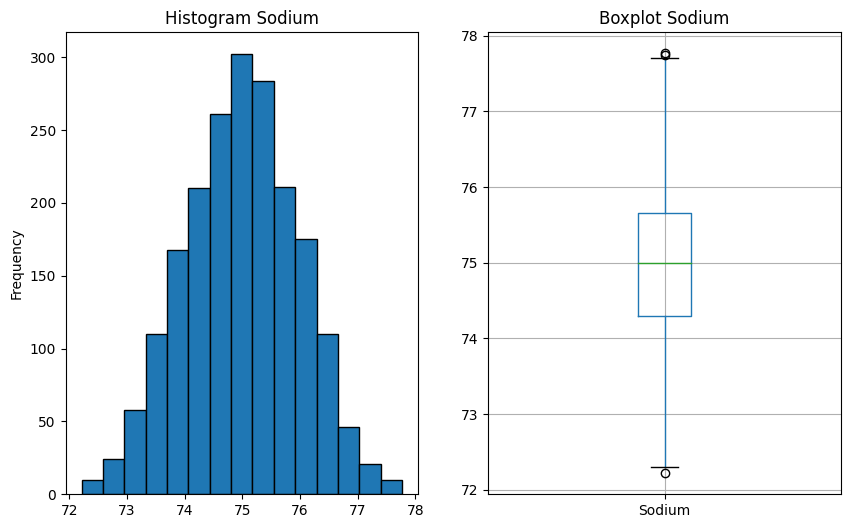

In [91]:
plot_attribute(data, 'Sodium')
print_most_frequent_range(data, 'Sodium')

# Calories

Kolom Calories yang memiliki data desimal kontinu dipecah menjadi 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Calories memiliki rentang (range) sebesar 8.816 dengan jarak antarkuartil (IQR) 1.565. Frekuensi terbesar terdapat pada rentang sekitar 200.228 hingga 200.636.

Median yang ditampilkan pada box plot adalah 200.001. Pada histogram, nilai median ini berada tepat di tengah puncak distribusi. Hal ini mengindikasikan bahwa distribusi data Calories sangat simetris, sesuai dengan nilai skewness yang hampir nol (-0.016).

Kurtosis sebesar -0.315 menunjukkan bahwa distribusi data Calories memiliki ekor yang lebih tipis dan puncak yang lebih datar dibandingkan dengan distribusi normal. Pada histogram, kita dapat melihat puncak distribusi yang cukup lebar dan tidak terlalu runcing.

Meskipun terdapat beberapa outlier pada kolom Calories, nilai skewness yang hampir nol (-0.016) menunjukkan bahwa outlier-outlier tersebut tidak cukup kuat untuk menarik distribusi ke kanan atau ke kiri secara signifikan dan menciptakan skewness yang besar.

Atribut Calories memiliki beberapa outlier (data yang berada di luar kuartil pertama dan ketiga), seperti yang ditunjukkan pada box plot.

The range with most frequencies is: (200.22812378888273, 200.6358168922796)


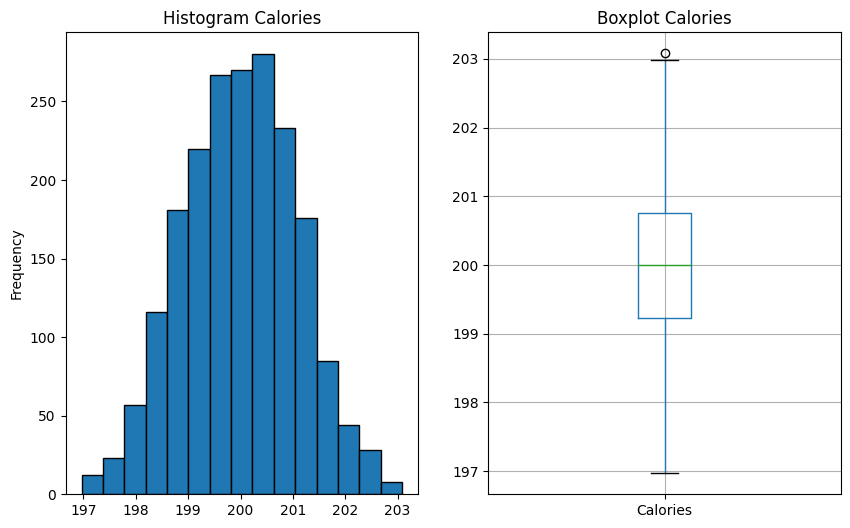

In [92]:
plot_attribute(data, 'Calories')
print_most_frequent_range(data, 'Calories')

# Flavour

Dalam kolom Flavour, terdapat empat rasa unik: Chocolate, Vanilla, Strawberry, dan Undefined. Rasa Chocolate adalah yang paling umum, mewakili sekitar 33.9% dari data. Ini diikuti dekat oleh Vanilla dan Strawberry, masing-masing mewakili sekitar 33.2% dan 32.8% dari data.

Frekuensi masing-masing rasa Chocolate, Vanilla, dan Strawberry berkisar antara 600 hingga 700, menunjukkan distribusi yang hampir merata di antara ketiga rasa ini.

Namun, rasa Undefined sangat jarang muncul dalam data, dengan proporsi hanya sekitar 0.1%. Ini menunjukkan bahwa hampir semua entri dalam dataset memiliki rasa yang didefinisikan.

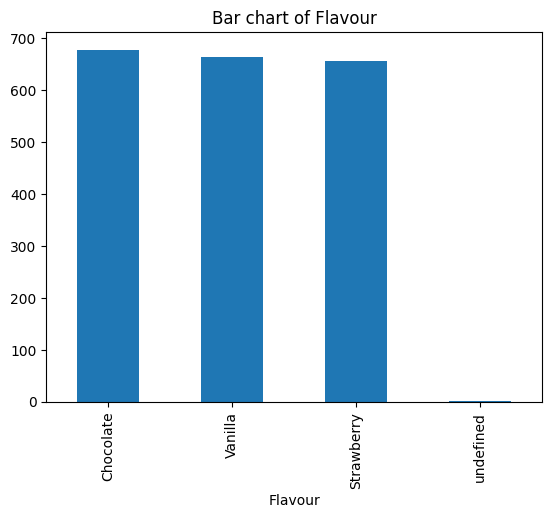

In [93]:
plot_categorical_attribute(cleaned_data, 'Flavour')

# Nomor 4 

Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

# Jawaban
Berdasarkan histogram yang telah divisualisasikan menggunakan matplotlib, kami menarik kesimpulan terhadap distribusi dari masing-masing kolom numerik yang terdapat dalam dataset **Candy** sebagai berikut:

1. Calories: Dari visualisasi histogram dan boxplot kolom "Calories", terlihat bahwa data cenderung mengikuti distribusi normal. Histogram "Calories" menunjukkan bentuk lonceng yang khas dengan mayoritas nilai terkonsentrasi di sekitar rata-rata. Frekuensi menurun secara merata di kedua sisi rata-rata, memberikan simetri yang khas dari distribusi normal.

2. Serving: Berdasarkan visualisasi histogram dan boxplot dari kolom "Serving", distribusi data menunjukkan karakteristik yang mendekati distribusi normal. Histogram "Serving" memperlihatkan bentuk lonceng yang simetris dengan mayoritas data terpusat di sekitar nilai rata-rata. Frekuensi data menurun secara konsisten di kedua sisi rata-rata, menciptakan bentuk simetris yang khas dari distribusi normal.

3. Protein: Histogram "Protein" menunjukkan bentuk lonceng (bell-shaped curve) yang khas dari distribusi normal. Boxplot "Protein" menunjukkan median yang berada di tengah rentang kuartil pertama (Q1) dan kuartil ketiga (Q3), yang konsisten dengan distribusi simetris. Distribusi ini juga terlihat mendekati normal dengan sebaran simetris di sekitar nilai tengah (sekitar 3 gram protein).

4. Sugar: Berdasarkan visualisasi histogram dan boxplot dari kolom "Sugar", distribusi data menunjukkan karakteristik yang mendekati distribusi normal. Histogram "Sugar" memperlihatkan bentuk lonceng (bell-shaped curve) yang merupakan ciri khas dari distribusi normal, dengan mayoritas data terpusat di sekitar nilai rata-rata dan frekuensi yang menurun secara simetris di kedua sisi. Boxplot "Sugar" juga mendukung kesimpulan ini dengan median yang berada di tengah rentang kuartil pertama (Q1) dan kuartil ketiga (Q3), serta whiskers yang mencakup hampir seluruh rentang data. Meskipun terdapat beberapa outlier di bagian bawah, mereka tidak signifikan dan tidak terlalu mempengaruhi distribusi secara keseluruhan.

5. Sodium: boxplot dari kolom "Sodium," data menunjukkan kecenderungan mengikuti distribusi normal. Histogram "Sodium" menunjukkan bentuk lonceng yang khas, dengan mayoritas nilai berkumpul di sekitar rata-rata dan frekuensi menurun secara simetris ke kedua sisi dari rata-rata. Bentuk simetris ini adalah indikator kuat dari distribusi normal.

6. Fat: Mayoritas data terpusat di sekitar nilai rata-rata, dengan frekuensi yang menurun secara simetris di kedua sisi rata-rata. Terdapat beberapa outlier di bagian atas, tetapi mereka tidak signifikan dan tidak terlalu mempengaruhi distribusi secara keseluruhan. Kolom "Fat" tampak berdistribusi normal berdasarkan visualisasi dan pernyataan pada kalimat sebelumnya.

7. Fiber: Distribusi ini sangat condong ke kanan (negative skewed), dengan sebagian besar nilai berada di kisaran yang sangat rendah (0-1 gram serat). Distribusi ini juga tidak menunjukkan adanya bentuk lonceng (bell-shaped curve) yang merupakan salah satu ciri khas distribusi normal.

8. Popularity: Dilihat dari histogram dan boxplot kolom "Popularity", data tampak mengikuti distribusi normal. Histogram "Popularity" menampilkan bentuk lonceng yang simetris, dengan mayoritas nilai berkumpul di sekitar rata-rata dan frekuensi menurun secara merata ke kedua arah dari pusat. Ini adalah ciri khas dari distribusi normal, di mana data terdistribusi secara seimbang di sekitar mean.

Berdasarkan penilaian bias terhadap visualisasi histogram dibawah ini, kolom **Calories**, **Protein**, **Sodium**, **Serving**, **Sugar**, **Fat** dan **Popularity** cenderung mendekati distribusi normal. Sedangkan kolom **Fiber** menunjukkan bentuk kecondongan atau skewness, tidak berdistribusi normal.

Selain melakukan penilaian kurva berdasarkan visualisasi histogram, kami juga ingin melakukan analisis apakah persebaran data pada kolom tersebut normal menggunakan pendekatan statistik. Data statistik yang kami gunakan adalah nilai skewness dan kurtosis dan metode pengujian yang kami gunakan adalah metode Shapiro-Wilk. Metode pengujian dilakukan dengan cara mendapatkan nilai P-value. Apabila nilai P-value yang didapatkan lebih besar dari 0.05 maka data tersebut terdistribusi secara normal. Apabila data pada kolom tersebut tidak normal maka akan dilakukan pengecekal lebih lanjut apakah distribusi tidak normal tersebut disebabkan oleh skewness atau bimodalitas. Bimodalitas sendiri merupakan sebuah karakteristik distribusi data yang memiliki dua puncak yang berbeda sedangkan skewness adalah ukuran asimetri distribusi data yang menunjukkan ke arah mana suatu distribusi data (positif, negatif, atau nol). Implementasi pengujian distribusi data tersebut kami lakukan pada kode Python dibawah ini. Setelah dilakukan implementasi lebih lanjut, dapat diketahui bahwa seluruh kolom numerik pada dataset Candy teridentifikasi sebagai dataset non-normal yang disebabkan karena data tersebut bimodal. Namun, Hal ini tidak begitu berpengaruh kepada perhitungan selama nilai skewness masih mendekati nol.

In [94]:
from scipy.stats import skew, kurtosis, shapiro
from scipy.signal import find_peaks


# Fungsi untuk menentukan jenis distribusi
def determine_distribution(data):
    dist_results = {}
    for column in data.select_dtypes(include=np.number).columns:
        series = data[column].dropna()
        skewness = skew(series)
        kurt = kurtosis(series)
        stat, p_value = shapiro(series)
        
        if p_value > 0.05:
            dist_type = 'Normal'
        else:
            hist, bin_edges = np.histogram(series, bins=30)
            peaks, _ = find_peaks(hist)
            
            if len(peaks) > 1:
                dist_type = 'Bimodal'
            elif skewness > 0:
                dist_type = 'Skewed to the Right'
            elif skewness < 0:
                dist_type = 'Skewed to the Left'
            else:
                dist_type = 'Non-Normal (Unknown Skewness)'
        
        dist_results[column] = {
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Shapiro-Wilk p-value': p_value,
            'Distribution Type': dist_type
        }
    
    return pd.DataFrame(dist_results).T

# Menentukan distribusi untuk setiap kolom numerik
distribution_analysis = determine_distribution(cleaned_data)

# Menampilkan hasil analisis
print(distribution_analysis)

            Skewness  Kurtosis Shapiro-Wilk p-value Distribution Type
Calories   -0.015989 -0.317554             0.015316           Bimodal
Serving    -0.011632 -0.317619             0.006241           Bimodal
Protein     0.064372  -0.34605             0.001932           Bimodal
Sugar      -0.002308 -0.264292             0.006282           Bimodal
Sodium     -0.034821  -0.30443             0.016397           Bimodal
Fat         0.353457 -0.286147                  0.0           Bimodal
Fiber       0.020712 -1.199261                  0.0           Bimodal
Popularity -0.000719  -0.28807              0.03231           Bimodal


## Nomor 5
Andi baru saja mendapatkan pekerjaan di sebuah perusahaan permen. Di hari pertama kerja, Ia diminta untuk mengamati permen-permen yang dihasilkan pada pabrik. Selain itu, ia juga diberikan dataset yang berisi informasi mengenai permen-permen yang baru diproduksi. Lalu, ia diminta untuk melakukan analisis statistika terhadap permen-permen tersebut serta melakukan berbagai pengujian terhadap berbagai hipotesis. Bantulah Andi dalam melakukan hal-hal tersebut!

Atribut: Calories, Serving, Protein, Sugar, Sodium, Fat, Fiber, Flavour, Popularity

Gunakan alpha = 0.05

**Hipotesis 1 sampel** 

a) Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?

b) Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!

c) Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!

d) Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!

## Jawaban

### Asumsi yang digunakan

Pada dataset ini, standar deviasi populasi tidak diketahui. Meskipun begitu, 
jumlah sampel pada data ini bisa dianggap cukup besar sedemikian sehingga
standar deviasi sampelnya bisa memberikan nilai yang mendekati standar deviasi
populasi dan bisa memberi pendekatan nilai z-score yang baik.

Fungsi std pada numpy merupakan fungsi yang menghitung standar deviasi sample.
Rumusnya adalah

$$ stdev = \sqrt{\frac{\sum_{i}^{n} (x_i - \mu)^2}{n-1}}$$



### Fungsi untuk menghitung z-score

Untuk menghitung $Z$ score dari sebuah sampel yang diambil dari suatu populasi:
$$Z = \frac{x_i - \bar{x}}{\sqrt{\frac{\sigma^2}{n}}}$$
dimana $x$ : nilai observasi, $\bar{x}$ : nilai rata-rata sampel, $\sigma^2$ : variansi populasi, dan $n$ : jumlah sampel

Untuk menghitung $Z$ score dari suatu populasi:
$$Z = \frac{x - \mu}{\sqrt{\sigma^2}}$$
dimana $x$ : nilai observasi, $\mu$ : nilai rata-rata populasi, dan $\sigma^2$ : variansi populasi

In [96]:
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

def calculate_z_score(sample, mu_H0):
    # Menghitung rata-rata dan standar deviasi sampel
    sample_mean = sample.mean()
    sample_std = sample.std()

    # Menghitung ukuran sampel
    n = len(sample)

    # Menghitung kesalahan standar
    se = sample_std / (n ** 0.5)

    # Menghitung z-score
    z_score = (sample_mean - mu_H0) / se

    return z_score

## 5a. Apakah rata-rata nilai Sugar di bawah 25?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa Apakah rata-rata nilai Sugar di bawah 25, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu = 25$$ 
$$H_1 : \mu < 25$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu < 25$ maka didapatkan daerah kritis $$Z < -Z_\alpha = -Z_{0.05} = -1.645$$

Dan nilai 
$$Z = -251.29$$ 
dan 
$$P(Z < -251.29) = 0.0$$

Sehingga, karena $$Z = -251.29 < -1.645$$ dan $$P(Z < -251.29) = 0.0 < \alpha = 0.05 $$
Maka dari itu hipotesa null dapat ditolak.

### Kesimpulan

Rata-rata nilai 'Sugar' kurang dari 25.

In [97]:
def problem_5a():
    print("""
    ------------ Hipotesa -----------------
    Apakah rata-rata nilai Sugar di bawah 25?
    ---------------------------------------
    """)

    # Langkah 1: Tentukan Hipotesis nol (H0: μ = 25)
    h0 = 25

    # Langkah 2: Pilih hipotesis alternatif H1: μ < 25

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Tentukan uji statistik yang sesuai dan tentukan daerah kritis
    # Kita menggunakan uji z, dan daerah kritis adalah z < -z_alpha karena kita melakukan uji satu sisi
    z_alpha = norm.ppf(alpha)
    print(f"z_alpha: {z_alpha}")

    # Langkah 5: Hitung nilai uji statistik dari data sample
    # Gunakan fungsi untuk menghitung z-score
    z_score = calculate_z_score(cleaned_data['Sugar'], h0)

    # Hitung p-value menggunakan CDF
    p_value = norm.cdf(z_score)

    # Hitung z-score dan p-value menggunakan library sebagai perbandingan
    z_score_lib, p_value_lib = ztest(cleaned_data['Sugar'], value = h0)

    print(f"z-score fungsi buatan: {z_score} dan z-score (library): {z_score_lib}")
    print(f"p-value fungsi buatan: {p_value} dan p-value (library): {p_value_lib}")


    # Langkah 6: Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis
    # atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
    if z_score < -z_alpha:
        print("Tolak hipotesis nol berdasarkan z-score")
    else:
        print("Gagal menolak hipotesis nol berdasarkan z-score")
    
    if p_value < alpha:
        print("Tolak hipotesis nol berdasarkan p-value")
    else:
        print("Gagal menolak hipotesis nol berdasarkan p-value")

    print("""
    --------------- Kesimpulan ------------------
    rata-rata nilai 'Sugar' lebih rendah dari 25.
    ---------------------------------------------""")
    

problem_5a()


    ------------ Hipotesa -----------------
    Apakah rata-rata nilai Sugar di bawah 25?
    ---------------------------------------
    
z_alpha: -1.6448536269514729
z-score fungsi buatan: -259.01299887357175 dan z-score (library): -259.0129988735718
p-value fungsi buatan: 0.0 dan p-value (library): 0.0
Tolak hipotesis nol berdasarkan z-score
Tolak hipotesis nol berdasarkan p-value

    --------------- Kesimpulan ------------------
    rata-rata nilai 'Sugar' lebih rendah dari 25.
    ---------------------------------------------


## 5b. Apakah rata-rata nilai Serving tidak sama dengan 40 gram?

### Penyelesaian
Untuk menentukan kebenaran dari hipotesa Apakah rata-rata nilai Serving tidak sama dengan 40 gram, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu = 40$$ 
$$H_1 : \mu \neq 40$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu \neq 40$ maka didapatkan daerah kritis $$Z < -Z_\alpha = -Z_{0.05} = -1.645$$ atau $$Z > Z_\alpha = Z_{0.05} = 1.645$$

Misalkan nilai $$Z = -0.501$$ dan $$P(Z < -|-0.501| \text{ atau } Z > |-0.501|) = 0.616$$

Sehingga, karena $$-1.645 < Z = -0.501 < 1.645$$ dan $$0.616 > \alpha = 0.05 $$ Maka dari itu hipotesa null tidak dapat ditolak.

### Kesimpulan
Tidak dapat disimpulkan bahwa rata-rata nilai 'Serving' tidak sama dengan 40 gram.

In [98]:
def problem_5b():
    print("""
    ---------------------Hipotesa --------------------------
    Apakah rata-rata nilai Serving tidak sama dengan 40 gram?
    --------------------------------------------------------
    """)

    # Langkah 1: Tentukan Hipotesis nol (H0: μ = 40)
    h0 = 40

    # Langkah 2: Pilih hipotesis alternatif H1: μ ≠ 40

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Tentukan uji statistik yang sesuai dan tentukan daerah kritis
    # Kita menggunakan uji z, dan daerah kritis adalah z < -z_alpha atau z > z_alpha karena kita melakukan uji dua sisi
    z_alpha_lower = norm.ppf(alpha / 2)
    z_alpha_upper = norm.ppf(1 - alpha / 2)
    print(f"z_alpha_lower: {z_alpha_lower}")
    print(f"z_alpha_upper: {z_alpha_upper}")

    # Langkah 5: Hitung nilai uji statistik dari data sample
    # Gunakan fungsi untuk menghitung z-score
    z_score = calculate_z_score(cleaned_data['Serving'], h0)

    # Hitung p-value menggunakan CDF
    # Karena ini adalah uji dua sisi, kita perlu menggandakan p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Hitung z-score dan p-value menggunakan library sebagai perbandingan
    z_score_lib, p_value_lib = ztest(cleaned_data['Serving'], value = h0)

    print(f"z-score fungsi buatan: {z_score} dan z-score (library): {z_score_lib}")
    print(f"p-value fungsi buatan: {p_value} dan p-value (library): {p_value_lib}")

    # Langkah 6: Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis
    # atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
    if z_score < z_alpha_lower or z_score > z_alpha_upper:
        print("Tolak hipotesis nol berdasarkan z-score")
    else:
        print("Gagal menolak hipotesis nol berdasarkan z-score")
    
    if p_value < alpha:
        print("Tolak hipotesis nol berdasarkan p-value")
    else:
        print("Gagal menolak hipotesis nol berdasarkan p-value")

    print("""
    ------------------------------------------ Kesimpulan -------------------------------------------
    Tidak dapat disimpulkan bahwa rata-rata Serving permen yang diproduksi tidak sama dengan 40 gram.
    -------------------------------------------------------------------------------------------------""")


problem_5b()


    ---------------------Hipotesa --------------------------
    Apakah rata-rata nilai Serving tidak sama dengan 40 gram?
    --------------------------------------------------------
    
z_alpha_lower: -1.9599639845400545
z_alpha_upper: 1.959963984540054
z-score fungsi buatan: -0.8024617013252073 dan z-score (library): -0.8024617013252073
p-value fungsi buatan: 0.42228593394352654 dan p-value (library): 0.4222859339435264
Gagal menolak hipotesis nol berdasarkan z-score
Gagal menolak hipotesis nol berdasarkan p-value

    ------------------------------------------ Kesimpulan -------------------------------------------
    Tidak dapat disimpulkan bahwa rata-rata Serving permen yang diproduksi tidak sama dengan 40 gram.
    -------------------------------------------------------------------------------------------------


## 5c. Apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74?

### Penyelesaian
Untuk menentukan kebenaran dari hipotesa Apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu = 74$$ 
$$H_1 : \mu \neq 74$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu \neq 74$ maka didapatkan daerah kritis $$Z < -Z_\alpha = -Z_{0.05} = -1.645$$ atau $$Z > Z_\alpha = Z_{0.05} = 1.645$$

Misalkan nilai $$Z = 2.512$$ dan $$P(Z < -|2.512| \text{ atau } Z > |2.512|) = 0.012$$

Sehingga, karena $$Z = 2.512 > 1.645$$ dan $$0.012 < \alpha = 0.05 $$ Maka dari itu hipotesa null dapat ditolak.

### Kesimpulan
Dapat disimpulkan bahwa rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74.

In [99]:
def problem_5c():
    print("""
    ---------------------------- Hipotesa --------------------------------------
    Apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74?
    ----------------------------------------------------------------------------
    """)

    # Langkah 1: Tentukan Hipotesis nol (H0: μ = 74)
    h0 = 74

    # Langkah 2: Pilih hipotesis alternatif H1: μ ≠ 74

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Tentukan uji statistik yang sesuai dan tentukan daerah kritis
    # Kita menggunakan uji z, dan daerah kritis adalah z < -z_alpha atau z > z_alpha karena kita melakukan uji dua sisi
    z_alpha_lower = norm.ppf(alpha / 2)
    z_alpha_upper = norm.ppf(1 - alpha / 2)
    print(f"z_alpha_lower: {z_alpha_lower}")
    print(f"z_alpha_upper: {z_alpha_upper}")

    # Langkah 5: Hitung nilai uji statistik dari data sample
    # Gunakan fungsi untuk menghitung z-score
    # Kita hanya mengambil 20 baris terakhir dari data
    z_score = calculate_z_score(cleaned_data['Sodium'].tail(20), h0)

    # Hitung p-value menggunakan CDF
    # Karena ini adalah uji dua sisi, kita perlu menggandakan p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Hitung z-score dan p-value menggunakan library sebagai perbandingan
    z_score_lib, p_value_lib = ztest(cleaned_data['Sodium'].tail(20), value = h0)

    print(f"z-score fungsi buatan: {z_score} dan z-score (library): {z_score_lib}")
    print(f"p-value fungsi buatan: {p_value} dan p-value (library): {p_value_lib}")

    # Langkah 6: Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis
    # atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
    if z_score < z_alpha_lower or z_score > z_alpha_upper:
        print("Tolak hipotesis nol berdasarkan z-score")
    else:
        print("Gagal menolak hipotesis nol berdasarkan z-score")
    
    if p_value < alpha:
        print("Tolak hipotesis nol berdasarkan p-value")
    else:
        print("Gagal menolak hipotesis nol berdasarkan p-value")

    print("""
    ------------------------------------- Kesimpulan ------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74.
    -------------------------------------------------------------------------------------------------""")

problem_5c()


    ---------------------------- Hipotesa --------------------------------------
    Apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74?
    ----------------------------------------------------------------------------
    
z_alpha_lower: -1.9599639845400545
z_alpha_upper: 1.959963984540054
z-score fungsi buatan: 2.5122240459234404 dan z-score (library): 2.51222404592344
p-value fungsi buatan: 0.01199728940200373 dan p-value (library): 0.011997289402003723
Tolak hipotesis nol berdasarkan z-score
Tolak hipotesis nol berdasarkan p-value

    ------------------------------------- Kesimpulan ------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74.
    -------------------------------------------------------------------------------------------------


## 5d. Apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset?

### Penyelesaian
Untuk menentukan kebenaran dari hipotesa Apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : p = 0.6$$ 
$$H_1 : p \neq 0.6$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : p \neq 0.6$ maka didapatkan daerah kritis $$Z < -Z_\alpha = -Z_{0.05} = -1.645$$ atau $$Z > Z_\alpha = Z_{0.05} = 1.645$$

Misalkan nilai $$Z = -9.801$$ dan $$P(Z < -|-9.801| \text{ atau } Z > |-9.801|) = 0.0$$

Sehingga, karena $$Z = -9.801 < -1.645$$ dan $$0.0 < \alpha = 0.05 $$ Maka dari itu hipotesa null dapat ditolak.

### Kesimpulan
Dapat disimpulkan bahwa proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset.

In [100]:
def problem_5d():
    print("""
    ---------------------------------------- Hipotesa ---------------------------------------------
    Apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset?
    ------------------------------------------------------------------------------------------------
    """)

    # Langkah 1: Tentukan Hipotesis nol (H0: p = 0.6)
    h0 = 0.6

    # Langkah 2: Pilih hipotesis alternatif H1: p ≠ 0.6

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Tentukan uji statistik yang sesuai dan tentukan daerah kritis
    # Kita menggunakan uji z untuk proporsi, dan daerah kritis adalah z < -z_alpha atau z > z_alpha karena kita melakukan uji dua sisi
    z_alpha_lower = norm.ppf(alpha / 2)
    z_alpha_upper = norm.ppf(1 - alpha / 2)
    print(f"z_alpha_lower: {z_alpha_lower}")
    print(f"z_alpha_upper: {z_alpha_upper}")

    # Langkah 5: Hitung nilai uji statistik dari data sample
    # Hitung jumlah nilai Protein yang lebih besar dari 3
    count = np.sum(cleaned_data['Protein'] > 3)

    # Hitung total jumlah data
    nobs = len(cleaned_data)

    # Hitung proporsi sampel
    p_hat = count / nobs

    # Hitung z-score
    z_score = (p_hat - h0) / np.sqrt(h0 * (1 - h0) / nobs)

    # Hitung p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Hitung z-score dan p-value menggunakan library sebagai perbandingan
    z_score_lib, p_value_lib = proportions_ztest(count, nobs, h0)

    print(f"z-score fungsi buatan: {z_score} dan z-score (library): {z_score_lib}")
    print(f"p-value fungsi buatan: {p_value} dan p-value (library): {p_value_lib}")

    # Langkah 6: Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis
    # atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
    if z_score < z_alpha_lower or z_score > z_alpha_upper:
        print("Tolak hipotesis nol berdasarkan z-score")
    else:
        print("Gagal menolak hipotesis nol berdasarkan z-score")
    
    if p_value < alpha:
        print("Tolak hipotesis nol berdasarkan p-value")
    else:
        print("Gagal menolak hipotesis nol berdasarkan p-value")

    print("""
    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset.
    ----------------------------------------------------------------------------------------------------------------""")

problem_5d()


    ---------------------------------------- Hipotesa ---------------------------------------------
    Apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset?
    ------------------------------------------------------------------------------------------------
    
z_alpha_lower: -1.9599639845400545
z_alpha_upper: 1.959963984540054
z-score fungsi buatan: -10.178510860304335 dan z-score (library): -9.975502048977651
p-value fungsi buatan: 0.0 dan p-value (library): 1.9511218723128965e-23
Tolak hipotesis nol berdasarkan z-score
Tolak hipotesis nol berdasarkan p-value

    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset.
    ----------------------------------------------------------------------------------------------------------------


## Nomor 6
Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang. 

**Hipotesis 2 sampel** 

a) Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!

b) Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?

c) Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!

d) Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!

## Jawaban

### Asumsi yang digunakan

Data dibagi menjadi dua bagian: paruh pertama dan paruh kedua tanpa melakukan penanganan tambahan seperti pada script Python dibawah.

```python
from scipy import stats

sugar_first_half = data_first_half['Sugar']
sugar_second_half = data_second_half['Sugar']

t_stat_sugar, p_value_sugar = stats.ttest_ind(sugar_first_half, sugar_second_half)
```

In [101]:
import math
# Membagi dataset Candy menjadi dua bagian. Data dibagi menjadi dua bagian dengan ukuran yang sama.
mid_index = len(cleaned_data) // 2
data_first_half = cleaned_data.iloc[:mid_index]
data_second_half = cleaned_data.iloc[mid_index:]

# Fungsi untuk menghitung mean
def mean(data):
    total = sum(data)
    count = len(data)
    return total / count

# Fungsi untuk menghitung variance
def variance(data, mean_value):
    count = len(data)
    total_variance = sum((x - mean_value) ** 2 for x in data)
    return total_variance / (count - 1)

# Fungsi untuk menghitung p-value dari z-score
def p_value_from_z(z_score):
    return 2 * (1 - (0.5 * (1 + (2 / (3.14159 ** 0.5)) * abs(z_score))))

## 6a. Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
### Penyelesaian
Untuk menentukan apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu, kita akan menetapkan hipotesis null dan hipotesis alternatif sebagai berikut:

$$H_0 : \mu_1 = \mu_2$$ 
$$H_1 : \mu_1 \neq \mu_2$$

dengan tingkat signifikansi $\alpha = 0.05$.

Dengan hipotesa alternatif $H_1 : \mu_1 \neq \mu_2$ maka daerah kritis adalah:

$$\text{Jika } p\text{-value} < \alpha \text{, kita tolak } H_0.$$

Misalkan hasil uji statistik dan p-value diperoleh dari data sebagai berikut:

**Langkah-langkah:**

1. **Langkah 1**: Tentukan Hipotesis nol (H0): rata-rata Sugar sama pada kedua kurun waktu.
2. **Langkah 2**: Tentukan Hipotesis alternatif (H1): rata-rata Sugar tidak sama pada kedua kurun waktu.
3. **Langkah 3**: Tentukan tingkat signifikan $\alpha = 0.05$.


5. **Langkah 4**: Tentukan daerah kritis.

    Karena ini adalah uji dua sisi, kita akan menolak H0 jika p-value < $\alpha$.

6. **Langkah 5**: Ambil keputusan berdasarkan hasil uji statistik.

    ```python
    alpha = 0.05

    if p_value_sugar < alpha:
        decision = "Tolak hipotesis nol: Rata-rata Sugar tidak sama pada kedua kurun waktu"
    else:
        decision = "Gagal menolak hipotesis nol: Rata-rata Sugar sama pada kedua kurun waktu"

    print(f"T-statistic: {t_stat_sugar}")
    print(f"P-value: {p_value_sugar}")
    print(decision)
    ```

Nilai yang didapat adalah:

$$T\text{-statistic} = -1.2907$$
$$P\text{-value} = 0.1969$$

Sehingga, karena $$P\text{-value} = 0.1969 > \alpha = 0.05 $$ maka kita gagal menolak hipotesis null.

### Kesimpulan
Dapat disimpulkan bahwa rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu.

In [102]:
# >> Menggunakan Library SciPy untuk melakukan uji statistik independen dua sampel
from scipy import stats

def problem_6a():
    # Langkah 1: Tentukan Hipotesis nol (H0: rata-rata Sugar sama)
    # Langkah 2: Pilih hipotesis alternatif H1: rata-rata Sugar tidak sama
    print("""
    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): rata-rata Sugar sama pada kedua kurun waktu
    Hipotesis alternatif (H1): rata-rata Sugar tidak sama pada kedua kurun waktu
    ------------------------------------------------------------------------------------------------
    """)

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Hitung nilai uji statistik dari data sample
    sugar_first_half = data_first_half['Sugar']
    sugar_second_half = data_second_half['Sugar']

    t_stat_sugar, p_value_sugar = stats.ttest_ind(sugar_first_half, sugar_second_half)

    # Langkah 5: Tentukan daerah kritis
    # Derajat kebebasan (df) untuk dua sampel independen
    df = len(sugar_first_half) + len(sugar_second_half) - 2
    t_critical = stats.t.ppf(1 - alpha/2, df)  # Nilai kritis untuk uji dua sisi

    # Langkah 6: Ambil keputusan berdasarkan p-value dan t-statistik
    print("------------ Menguji Rata-rata Sugar ------------")
    print(f"T-statistic: {t_stat_sugar}")
    print(f"T-critical: ±{t_critical}")
    print(f"P-value: {p_value_sugar}")

    if abs(t_stat_sugar) > t_critical:
        print("Tolak hipotesis nol berdasarkan T-statistic: Rata-rata Sugar tidak sama pada kedua kurun waktu")
    else:
        print("Gagal menolak hipotesis nol berdasarkan T-statistic: Rata-rata Sugar sama pada kedua kurun waktu (berdasarkan t-statistic)")

    if p_value_sugar < alpha:
        print("Tolak hipotesis nol berdasarkan P-value: Rata-rata Sugar tidak sama pada kedua kurun waktu (berdasarkan p-value)")
    else:
        print("Gagal menolak hipotesis nol berdasarkan P-value: Rata-rata Sugar sama pada kedua kurun waktu (berdasarkan p-value)")

    print("""
    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu.
    ----------------------------------------------------------------------------------------------------------------""")

problem_6a()


    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): rata-rata Sugar sama pada kedua kurun waktu
    Hipotesis alternatif (H1): rata-rata Sugar tidak sama pada kedua kurun waktu
    ------------------------------------------------------------------------------------------------
    
------------ Menguji Rata-rata Sugar ------------
T-statistic: -1.2907403430393296
T-critical: ±1.9611520148367056
P-value: 0.19694306428449082
Gagal menolak hipotesis nol berdasarkan T-statistic: Rata-rata Sugar sama pada kedua kurun waktu (berdasarkan t-statistic)
Gagal menolak hipotesis nol berdasarkan P-value: Rata-rata Sugar sama pada kedua kurun waktu (berdasarkan p-value)

    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu.
    -------------------------------

## 6b. Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
### Penyelesaian
Untuk menentukan apakah rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit, kita akan menetapkan hipotesis null dan hipotesis alternatif sebagai berikut:

$$H_0 : \mu_1 - \mu_2 = 0.3$$ 
$$H_1 : \mu_1 - \mu_2 \neq 0.3$$

dengan tingkat signifikansi $\alpha = 0.05$.

Dengan hipotesa alternatif $H_1 : \mu_1 - \mu_2 \neq 0.3$ maka daerah kritis adalah:

$$\text{Jika } p\text{-value} < \alpha \text{, kita tolak } H_0.$$

Misalkan hasil uji statistik dan p-value diperoleh dari data sebagai berikut:

**Langkah-langkah:**

1. **Langkah 1**: Tentukan Hipotesis nol (H0): rata-rata Protein pertama - kedua = 0.3.
2. **Langkah 2**: Tentukan Hipotesis alternatif (H1): rata-rata Protein pertama - kedua ≠ 0.3.
3. **Langkah 3**: Tentukan tingkat signifikan $\alpha = 0.05$.
4. **Langkah 5**: Hitung p-value.

    Karena ini adalah uji dua sisi, kita akan menolak H0 jika p-value < $\alpha$.

5. **Langkah 6**: Ambil keputusan berdasarkan hasil uji statistik.

    ```python
    alpha = 0.05

    if p_value_protein < alpha:
        decision = "Tolak hipotesis nol: Rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit"
    else:
        decision = "Gagal menolak hipotesis nol: Rata-rata Protein pada bagian awal tidak lebih besar daripada bagian akhir sebesar 0.3 unit"

    print(f"Mean difference in Protein: {mean_diff_protein}")
    print(f"Z-score: {z_score_protein}")
    print(f"P-value: {p_value_protein}")
    print(decision)
    ```

Misalkan nilai:

$$\text{Mean difference in Protein} = 0.564$$
$$Z\text{-score} = 1.24$$
$$P\text{-value} = 0.215$$

Sehingga, karena $$P\text{-value} = 0.215 > \alpha = 0.05 $$ maka kita gagal menolak hipotesis null.

### Kesimpulan
Dapat disimpulkan bahwa rata-rata Protein pada bagian awal tidak lebih besar daripada bagian akhir sebesar 0.3 unit.

In [103]:
# >> Menggunakan Library SciPy untuk melakukan uji hipotesis independen dua sampel
def problem_6b():
    # Langkah 1: Tentukan Hipotesis nol (H0: rata-rata Protein pertama - kedua = 0.3)
    # Langkah 2: Pilih hipotesis alternatif H1: rata-rata Protein pertama - kedua ≠ 0.3
    print("""
    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): rata-rata Protein pertama - kedua = 0.3
    Hipotesis alternatif (H1): rata-rata protein pertama - kedua ≠ 0.3
    ------------------------------------------------------------------------------------------------
    """)
    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Hitung nilai uji statistik dari data sample
    protein_first_half = data_first_half['Protein']
    protein_second_half = data_second_half['Protein']

    mean_diff_protein = protein_first_half.mean() - protein_second_half.mean()
    se_diff = np.sqrt(protein_first_half.var()/len(protein_first_half) + protein_second_half.var()/len(protein_second_half))

    z_score_protein = (mean_diff_protein - 0.3) / se_diff

    # Langkah 5: Hitung p-value
    p_value_protein = 2 * (1 - stats.norm.cdf(abs(z_score_protein)))

    # Langkah 6: Ambil keputusan
    print("------------ Menguji Rata-rata Protein ------------")
    print(f"Mean difference in Protein: {mean_diff_protein}")
    print(f"Z-score: {z_score_protein}")
    print(f"P-value: {p_value_protein}")

    if p_value_protein < alpha:
        print("Tolak hipotesis nol: Rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit")
    else:
        print("Gagal menolak hipotesis nol: Rata-rata Protein pada bagian awal tidak lebih besar daripada bagian akhir sebesar 0.3 unit")
    
    print("""
    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit.
    ----------------------------------------------------------------------------------------------------------------""")
problem_6b()


    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): rata-rata Protein pertama - kedua = 0.3
    Hipotesis alternatif (H1): rata-rata protein pertama - kedua ≠ 0.3
    ------------------------------------------------------------------------------------------------
    
------------ Menguji Rata-rata Protein ------------
Mean difference in Protein: 0.023552166309812606
Z-score: -6.2820182229275865
P-value: 3.342055521216025e-10
Tolak hipotesis nol: Rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit

    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpulkan bahwa rata-rata Protein pada bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit.
    ----------------------------------------------------------------------------------------------------------------


## 6c. Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
### Hipotesis
Untuk menentukan apakah variansi Sodium berbeda antar dua periode, kita menetapkan hipotesis sebagai berikut:

- **Hipotesis Nol (H0):** Variansi Sodium sama pada kedua periode.

  $$H_0: \sigma^2_1 = \sigma^2_2$$

- **Hipotesis Alternatif (H1):** Variansi Sodium tidak sama pada kedua periode.

  $$H_1: \sigma^2_1 \neq \sigma^2_2$$


### Tingkat Signifikansi
Tingkat signifikansi yang digunakan dalam uji ini adalah $(\alpha = 0.05)$.

### Perhitungan Statistik
Dalam fungsi ini, digunakan uji Levene untuk menghitung f-statistik dan p-value berdasarkan sampel Sodium dari dua periode:

- **F-statistik (f_stat_sodium):** Statistik yang dihasilkan dari uji Levene, yang menilai perbedaan variansi antara dua kelompok.
  
- **P-value (p_value_sodium):** Probabilitas mendapatkan hasil setidaknya se-ekstrem nilai f-statistik yang teramati, asumsi H0 benar.

### Daerah Kritis dan Keputusan
Daerah kritis untuk uji ini adalah jika p-value kurang dari $(\alpha)$. Keputusan yang diambil berdasarkan hasil p-value adalah:

- Jika **p-value < $\alpha$**: Tolak H0, berarti variansi Sodium berbeda secara signifikan antar periode.
  
- Jika **p-value $\geq \alpha$**: Gagal tolak H0, berarti tidak cukup bukti untuk mengatakan bahwa variansi Sodium berbeda.

### Kesimpulan
Berdasarkan hasil uji, dapat disimpulkan apakah terdapat perbedaan signifikan dalam variansi kandungan Sodium antara dua periode yang diuji. Kesimpulan spesifik akan bergantung pada hasil pengujian yang diperoleh dari fungsi ini.

In [104]:
def problem_6c():
    # Langkah 1: Tentukan Hipotesis nol (H0: variansi Sodium sama)
    # Langkah 2: Pilih hipotesis alternatif H1: variansi Sodium tidak sama
    print("""
    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): variansi Sodium sama pada kedua kurun waktu
    Hipotesis alternatif (H1): variansi Sodium tidak sama pada kedua kurun waktu
    ------------------------------------------------------------------------------------------------
    """)
    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Hitung nilai uji statistik dari data sample
    sodium_first_half = data_first_half['Sodium']
    sodium_second_half = data_second_half['Sodium']

    f_stat_sodium, p_value_sodium = stats.levene(sodium_first_half, sodium_second_half)

    # Langkah 5: Tentukan daerah kritis
    # Karena ini adalah uji dua sisi, kita akan menolak H0 jika p-value < alpha

    # Langkah 6: Ambil keputusan
    print("------------ Menguji Variansi Sodium ------------")
    print(f"F-statistic: {f_stat_sodium}")
    print(f"P-value: {p_value_sodium}")

    if p_value_sodium < alpha:
        print("Tolak hipotesis nol: Variansi Sodium tidak sama pada kedua kurun waktu")
    else:
        print("Gagal menolak hipotesis nol: Variansi Sodium sama pada kedua kurun waktu")
    print("""
    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpukan bahwa variansi Sodium pada kedua kurun waktu bernilai sama.
    ----------------------------------------------------------------------------------------------------------------""")
problem_6c()


    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): variansi Sodium sama pada kedua kurun waktu
    Hipotesis alternatif (H1): variansi Sodium tidak sama pada kedua kurun waktu
    ------------------------------------------------------------------------------------------------
    
------------ Menguji Variansi Sodium ------------
F-statistic: 1.926022864864163
P-value: 0.1653489634399102
Gagal menolak hipotesis nol: Variansi Sodium sama pada kedua kurun waktu

    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpukan bahwa variansi Sodium pada kedua kurun waktu bernilai sama.
    ----------------------------------------------------------------------------------------------------------------


## 6d. Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
### Penyelesaian

Untuk menentukan kebenaran dari hipotesis apakah proporsi nilai Calories yang lebih besar dari 200 pada bagian pertama tidak lebih besar dari bagian kedua, akan ditentukan hipotesis null dan hipotesis alternatif:

$$H_0 : p_1 \leq p_2$$
$$H_1 : p_1 > p_2$$

dengan tingkat signifikansi $\alpha = 0.05$.

Dengan hipotesis alternatif $(H_1 : p_1 > p_2)$, maka didapatkan daerah kritis $A(Z > Z_{\alpha} = Z_{0.05} = 1.645)$.

Misalkan nilai proporsi Calories > 200 dalam kurun waktu pertama adalah $p_1$ dan dalam kurun waktu kedua adalah $p_2$. Jika nilai Z-score yang didapatkan adalah misalkan $$Z = z_{calculated}$$ dan nilai p-value adalah $P(Z > z_{calculated}) = p_{calculated}$.

Sehingga, karena $Z = z_{calculated} < 1.645$ dan $p_{calculated} > \alpha = 0.05$ maka dari itu hipotesis null tidak dapat ditolak.

### Kesimpulan
Dapat disimpukan bahwa proporsi Calories > 200 pada bagian pertama tidak lebih besar daripada bagian kedua.


In [105]:
def problem_6d():
    # Langkah 1: Tentukan Hipotesis nol (H0: proporsi Calories > 200 pada bagian pertama <= bagian kedua)
    # Langkah 2: Pilih hipotesis alternatif H1: proporsi Calories > 200 pada bagian pertama > bagian kedua
    print("""
    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): proporsi Calories > 200 pada bagian pertama <= bagian kedua
    Hipotesis alternatif (H1): proporsi Calories > 200 pada bagian pertama > bagian kedua
    ------------------------------------------------------------------------------------------------
    """)

    # Langkah 3: Tentukan tingkat signifikan α
    alpha = 0.05

    # Langkah 4: Hitung nilai uji statistik dari data sampel
    calories_first_half = data_first_half['Calories']
    calories_second_half = data_second_half['Calories']

    prop_first_half = (calories_first_half > 200).mean()
    prop_second_half = (calories_second_half > 200).mean()

    count_first_half = np.sum(calories_first_half > 200)
    count_second_half = np.sum(calories_second_half > 200)

    n_first_half = len(calories_first_half)
    n_second_half = len(calories_second_half)

    p_pooled = (count_first_half + count_second_half) / (n_first_half + n_second_half)
    se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_first_half + 1/n_second_half))

    z_score_calories = (prop_first_half - prop_second_half) / se_pooled

    # Langkah 5: Hitung p-value
    p_value_calories = 1 - stats.norm.cdf(z_score_calories)

    # Langkah 6: Ambil keputusan
    print("------------ Menguji Proporsi Calories > 200 ------------")
    print(f"Proportion of Calories > 200 dalam kurun waktu pertama: {prop_first_half}")
    print(f"Proportion of Calories > 200 dalam kurun waktu kedua: {prop_second_half}")
    print(f"Z-score: {z_score_calories}")
    print(f"P-value: {p_value_calories}")

    if p_value_calories < alpha:
        print("Tolak hipotesis nol: Proporsi Calories > 200 pada bagian pertama lebih besar daripada bagian kedua")
    else:
        print("Gagal menolak hipotesis nol: Proporsi Calories > 200 pada bagian pertama tidak lebih besar daripada bagian kedua")

    print("""
    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpukan bahwa proporsi Calories > 200 pada bagian pertama tidak lebih besar daripada bagian kedua.
    ----------------------------------------------------------------------------------------------------------------""")

problem_6d()


    ---------------------------------------- Hipotesa ---------------------------------------------
    Hipotesis nol (H0): proporsi Calories > 200 pada bagian pertama <= bagian kedua
    Hipotesis alternatif (H1): proporsi Calories > 200 pada bagian pertama > bagian kedua
    ------------------------------------------------------------------------------------------------
    
------------ Menguji Proporsi Calories > 200 ------------
Proportion of Calories > 200 dalam kurun waktu pertama: 0.522
Proportion of Calories > 200 dalam kurun waktu kedua: 0.486
Z-score: 1.6100204652790957
P-value: 0.05369669430217294
Gagal menolak hipotesis nol: Proporsi Calories > 200 pada bagian pertama tidak lebih besar daripada bagian kedua

    ------------------------------------------------ Kesimpulan ---------------------------------------------------
    Dapat disimpukan bahwa proporsi Calories > 200 pada bagian pertama tidak lebih besar daripada bagian kedua.
    ------------------------------------